In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('moore.csv', header=None).values
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [4]:
X = data[:, 0].reshape(-1, 1) # Make it a 2D array of size N x D where D = 1
Y = data[:, 1]

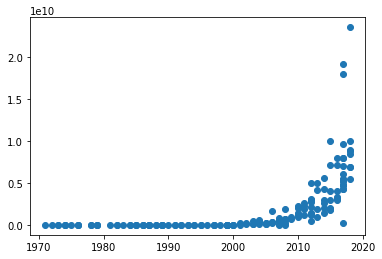

In [5]:
# Plot the data - exponential!
plt.scatter(X, Y)

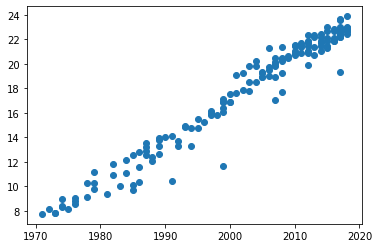

In [6]:
# Linear model -> Take the log
Y = np.log(Y)
plt.scatter(X, Y)

In [7]:
# Center the X data so the values are not too large
X = X - X.mean()

In [8]:
# Create TF model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1, )),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

# Learning rate scheduler
def schedule(epoch, lr):
    if (epoch >= 50):
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 991us/step - loss: 316.9134 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 295.5417 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 800us/step - loss: 273.8787 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1000us/step - loss: 277.5521 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 189.4774 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 115.4653 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 108.2407 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 65.9027 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1000us/step - loss: 55.6906 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 801us/step - loss: 36.7995 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/s

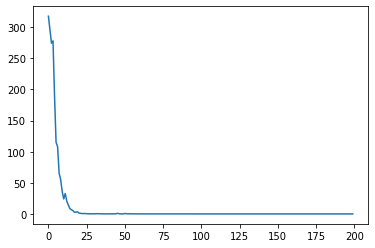

In [9]:
plt.plot(r.history['loss'], label='loss')

In [10]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Input layer doesn't count
print(model.layers[0].get_weights())

[array([[0.34251752]], dtype=float32), array([17.75974], dtype=float32)]


In [11]:
# The slope of the line
a = model.layers[0].get_weights()[0][0, 0]
a

0.34251752

In [12]:
print(f'Time to double: {np.log(2) / a}')

Time to double: 2.0236838411279376


# MAKE PREDICTIONS

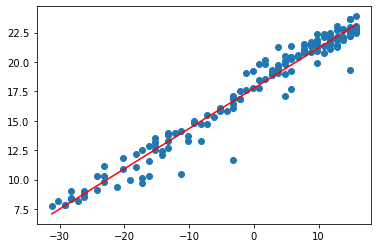

In [14]:
y_hat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, y_hat, 'r')

In [15]:
# Manual calculations
# Get the weights of the Dense layer
w, b = model.layers[0].get_weights()

# Reshape X b/c we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) -> (N x 1)
# flatten() for prediction
y_hat_2 = (X.dot(w) + b).flatten()

# No use == for floating points
np.allclose(y_hat, y_hat_2)

True